In [3]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#rmsd already doesn't contain 4DLI
infile = open('../Data/MAPK14_pairwise_struc_rmsds','rb')
rmsd = pickle.load(infile)
infile.close()

infile = open('../Data/MAPK14_ligand_names','rb')
ligands = pickle.load(infile)
infile.close()
#remove 4DLI
ligands.remove("4DLI")

infile = open('../Data/MAPK14_rmsds_2x2grid','rb')
performance_all = pickle.load(infile)
infile.close()

np_rmsd = np.array(rmsd)

In [4]:
#symmetric check
for i in range(len(np_rmsd)):
    for j in range(len(np_rmsd)):
        if np_rmsd[i][j] - np_rmsd[j][i] > 0.1:
            print("i: ", i, " j: ", j, " np_rmsd[i][j]: ", np_rmsd[i][j], " np_rmsd[j][i]: ", np_rmsd[j][i])

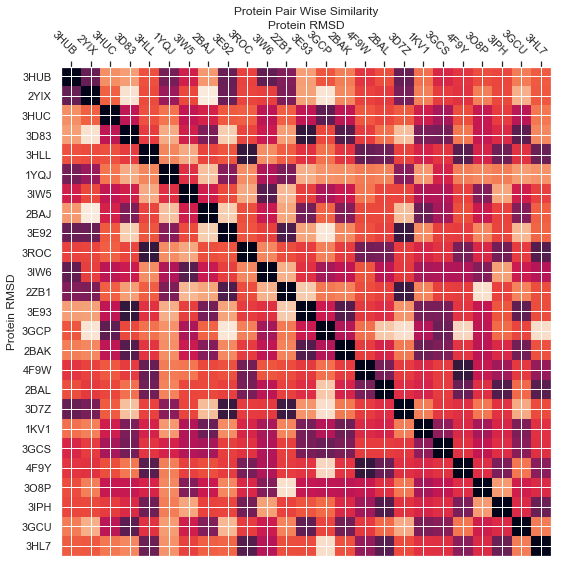

In [6]:
# sphinx_gallery_thumbnail_number = 2

D=np_rmsd

fig, ax = plt.subplots()
im = ax.imshow(D)

# We want to show all ticks...
ax.set_xticks(np.arange(len(ligands)))
ax.set_yticks(np.arange(len(ligands)))
# ... and label them with the respective list entries
ax.set_xticklabels(ligands)
ax.set_yticklabels(ligands)
ax.xaxis.tick_top()

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=315, ha="right",
         rotation_mode="anchor")

ax.set_title("Protein Pair Wise Similarity")
ax.set_xlabel('Protein RMSD', labelpad = -535)
ax.set_ylabel('Protein RMSD')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.show()

/Users/sbalachandar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if sys.path[0] == '':
/Users/sbalachandar/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


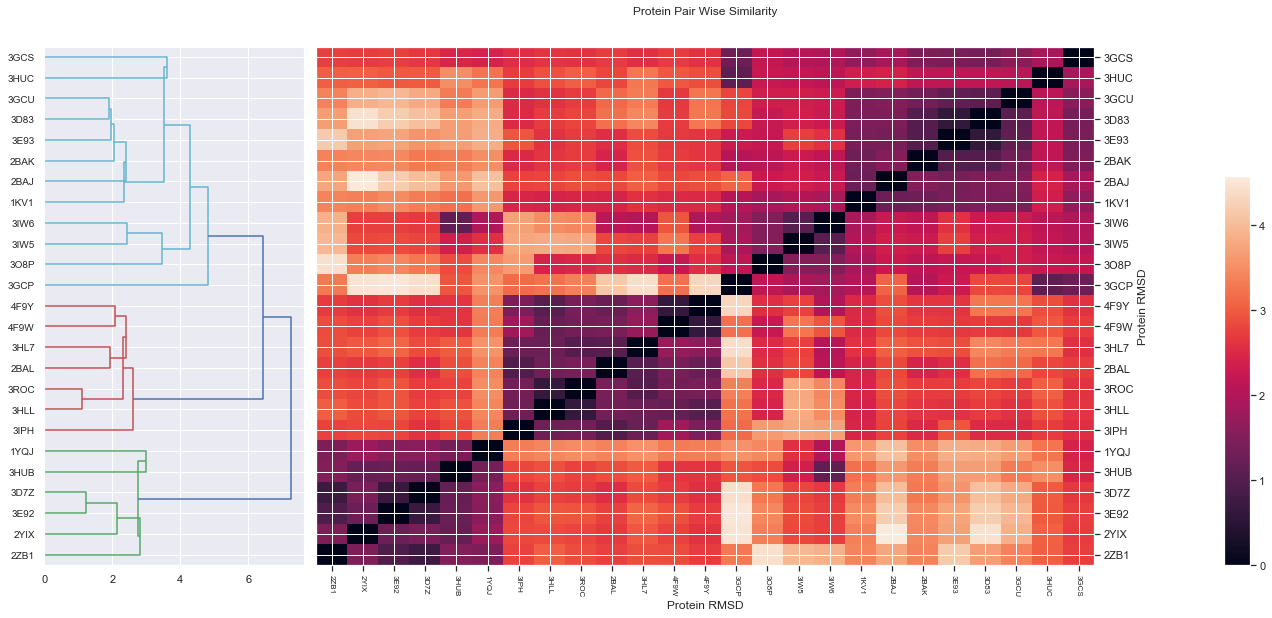

In [7]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate features and distance matrix.
D = np_rmsd

# Compute and plot dendrogram.
fig = pylab.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(D, method='centroid')
labelList = ligands
Z = sch.dendrogram(Y, orientation='right', labels=labelList)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']

x_ligands = []
for i in range(len(index)):
    x_ligands.append(ligands[index[i]])
y_ligands = x_ligands

D = D[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks(range(25))
axmatrix.set_xticklabels(x_ligands, minor=False)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()

pylab.xticks(rotation=-90, fontsize=8)

axmatrix.set_yticks(range(25))
axmatrix.set_yticklabels(y_ligands, minor=False)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()

axmatrix.set_title("Protein Pair Wise Similarity")
axmatrix.set_xlabel('Protein RMSD')
axmatrix.set_ylabel('Protein RMSD')

# Plot colorbar.
axcolor = fig.add_axes([1.0,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
#fig.savefig('dendrogram_all_pose_protein.png')

/Users/sbalachandar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  from ipykernel import kernelapp as app
/Users/sbalachandar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
/Users/sbalachandar/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


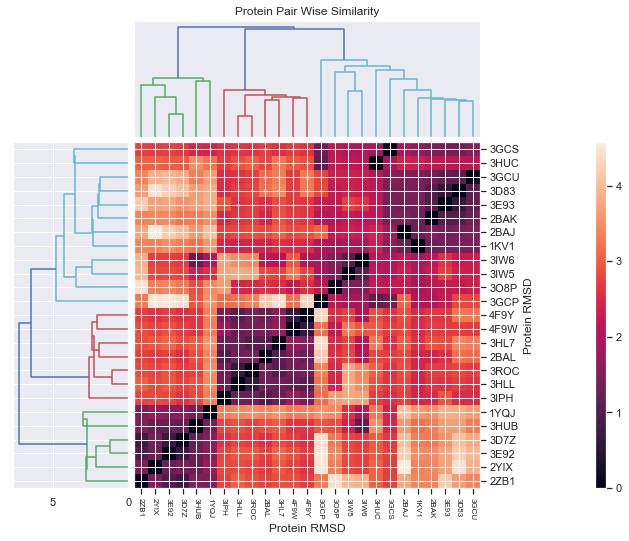

In [8]:
# Generate features and distance matrix.
D = np_rmsd
condensedD = D

# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(condensedD, method='centroid')
labelList = ligands
Z1 = sch.dendrogram(Y, orientation='left', labels=labelList)
# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(condensedD, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
y_ligands = []
for i in range(len(idx1)):
    y_ligands.append(ligands[idx1[i]])
x_ligands = []
for i in range(len(idx2)):
    x_ligands.append(ligands[idx2[i]])
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks(range(25))
axmatrix.set_xticklabels(x_ligands, minor=False)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()

pylab.xticks(rotation=-90, fontsize=8)

axmatrix.set_yticks(range(25))
axmatrix.set_yticklabels(y_ligands, minor=False)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()

axmatrix.set_title("Protein Pair Wise Similarity", pad = 110)
axmatrix.set_xlabel('Protein RMSD')
axmatrix.set_ylabel('Protein RMSD')

# Plot colorbar.
axcolor = fig.add_axes([1.1,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('dendrogram_cluster_protein_and_ligand_threshold.png')

In [9]:
performance_first = []
for ls_i in performance_all:
    arr = []
    for ls_j in ls_i:
        arr.append(ls_j[0])
    performance_first.append(arr)

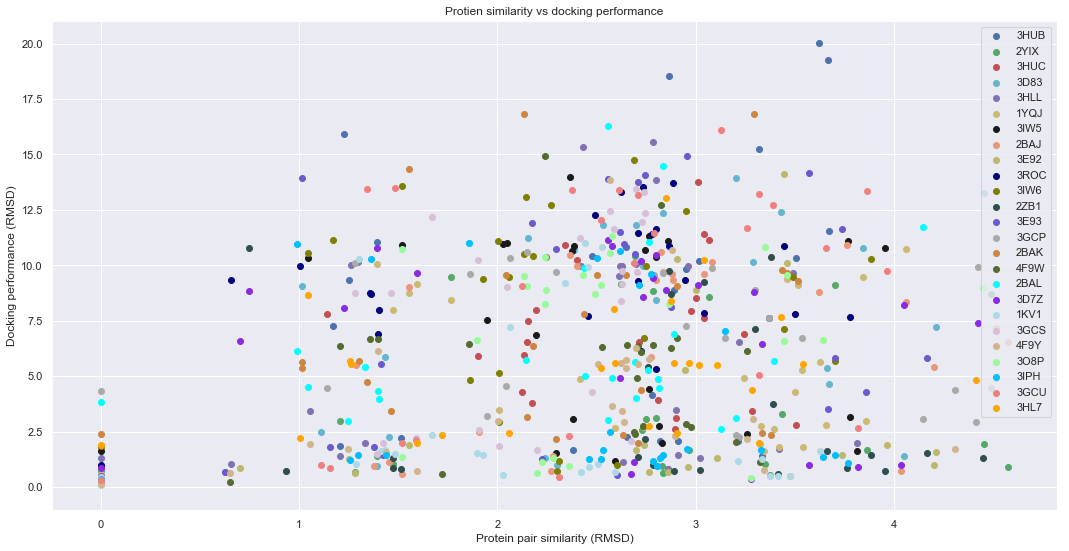

In [10]:
rmsd_list = []
rmsd_list_without_self = []
performance_first_list = []
colors = ["b", "g", "r", "c", "m", "y", "k", "darksalmon", "darkkhaki", "navy", "olive", "darkslategray", "slateblue", "darkgray", "peru", "darkolivegreen", "aqua", "blueviolet", "lightblue", "thistle", "tan", "palegreen", "deepskyblue", "lightcoral", "orange", "fuchsia"]

for i in range(len(rmsd)):
    arr = []
    for j in range(len(rmsd)):
        if i != j:
            arr.append(rmsd[i][j])
    rmsd_list_without_self += arr
    rmsd_list += rmsd[i]
    performance_first_list += performance_first[i]
    plt.scatter(rmsd[i], performance_first[i], color = colors[i], label = ligands[i])
plt.legend(loc = "upper right")
plt.title('Protien similarity vs docking performance')
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()

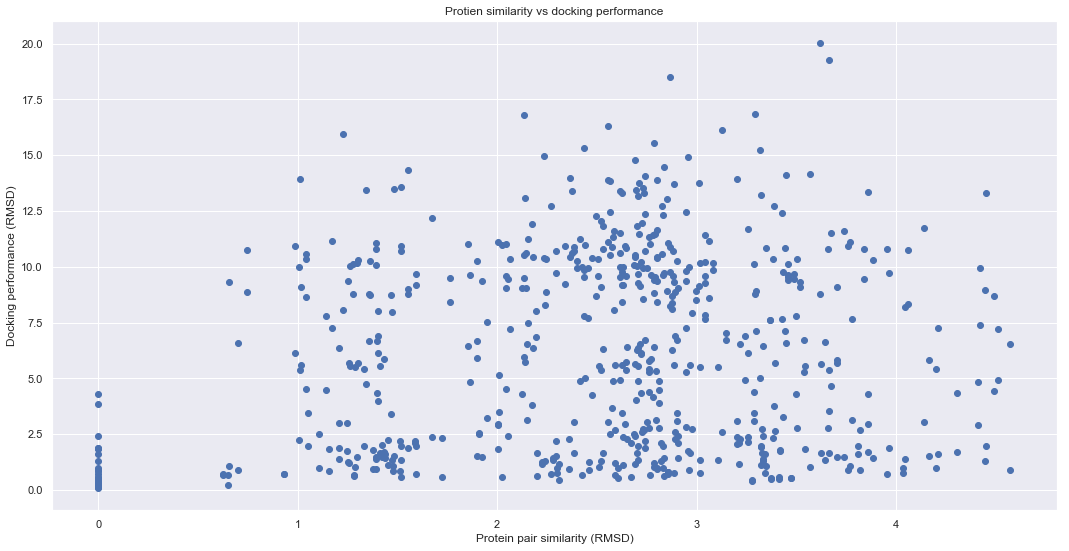

In [11]:
plt.scatter(rmsd_list, performance_first_list)
plt.title('Protien similarity vs docking performance')
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()

In [12]:
performance_best = []
for ls_i in performance_all:
    arr = []
    for ls_j in ls_i:
        arr.append(min(ls_j))
    performance_best.append(arr)

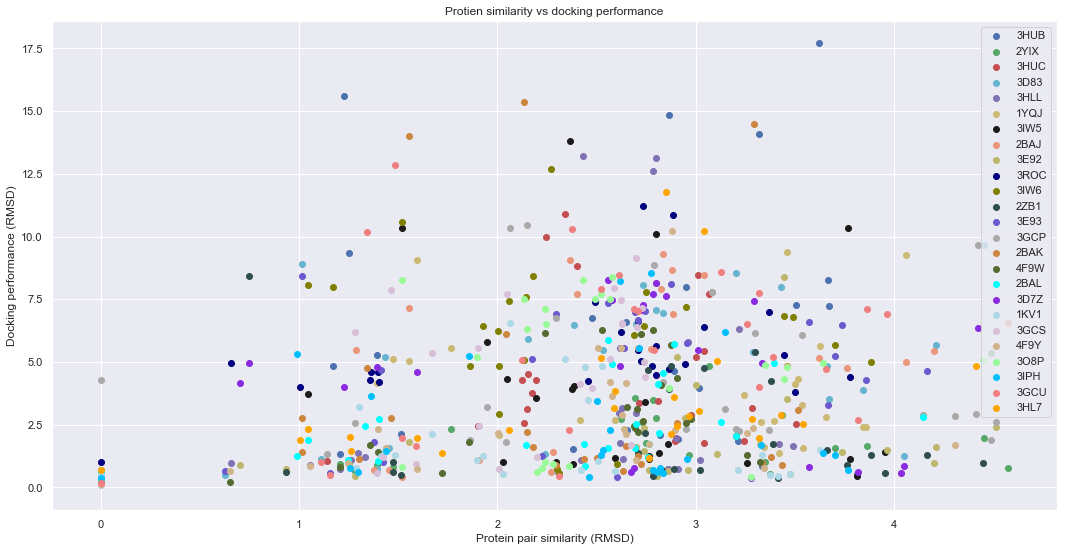

In [13]:
performance_best_list = []
performance_best_list_without_self = []
colors = ["b", "g", "r", "c", "m", "y", "k", "darksalmon", "darkkhaki", "navy", "olive", "darkslategray", "slateblue", "darkgray", "peru", "darkolivegreen", "aqua", "blueviolet", "lightblue", "thistle", "tan", "palegreen", "deepskyblue", "lightcoral", "orange", "fuchsia"]

for i in range(len(performance_best)):
    arr = []
    for j in range(len(performance_best)):
        if i != j:
            arr.append(performance_best[i][j])
    performance_best_list_without_self += arr
    performance_best_list += performance_best[i]
    plt.scatter(rmsd[i], performance_best[i], color = colors[i], label = ligands[i])
plt.legend(loc = "upper right")
plt.title('Protien similarity vs docking performance')
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()

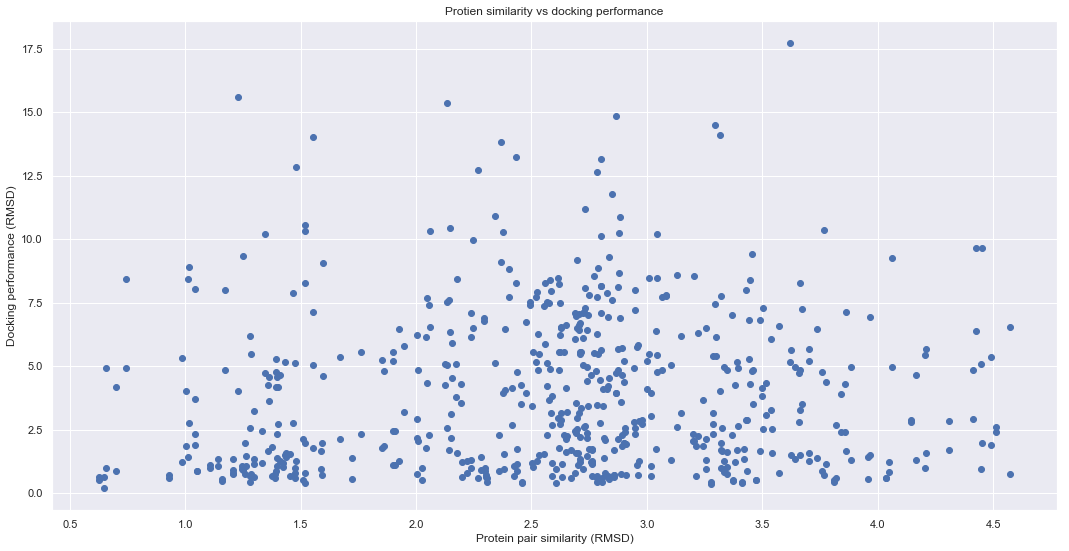

In [14]:
plt.scatter(rmsd_list_without_self, performance_best_list_without_self)
plt.title('Protien similarity vs docking performance')
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()

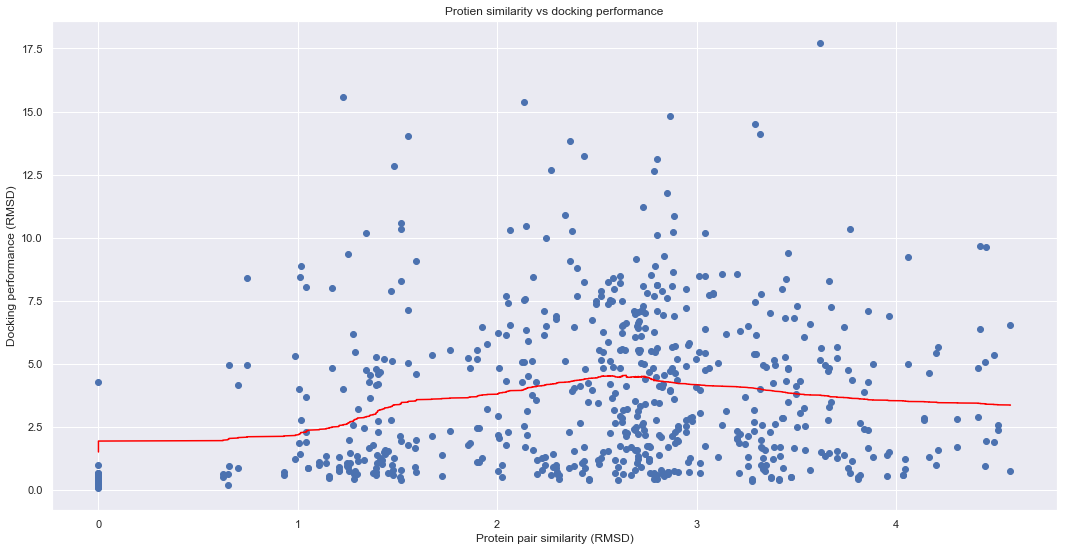

Correlation:  (0.16359997298948406, 3.964632563286158e-05)


In [15]:
import scipy.signal
import scipy.stats

np.random.seed(1)

combd_data = []
for i in range(len(rmsd_list)):
    combd_data.append([rmsd_list[i], performance_best_list[i]])
    
combd_data = sorted(combd_data)

combd_data_without_self = []
for i in range(len(rmsd_list_without_self)):
    combd_data_without_self.append([rmsd_list_without_self[i], performance_best_list_without_self[i]])
    
combd_data_without_self = sorted(combd_data_without_self)

x = [ls[0] for ls in combd_data]
y = [ls[1] for ls in combd_data]
yhat = scipy.signal.savgol_filter(y, 501, 2) # window size 51, polynomial order 3

plt.scatter(x,y)
plt.plot(x,yhat, color='red')
plt.title('Protien similarity vs docking performance')
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()
print("Correlation: ", scipy.stats.pearsonr(x, y))

ValueError: x and y must have same first dimension, but have shapes (600,) and (625,)

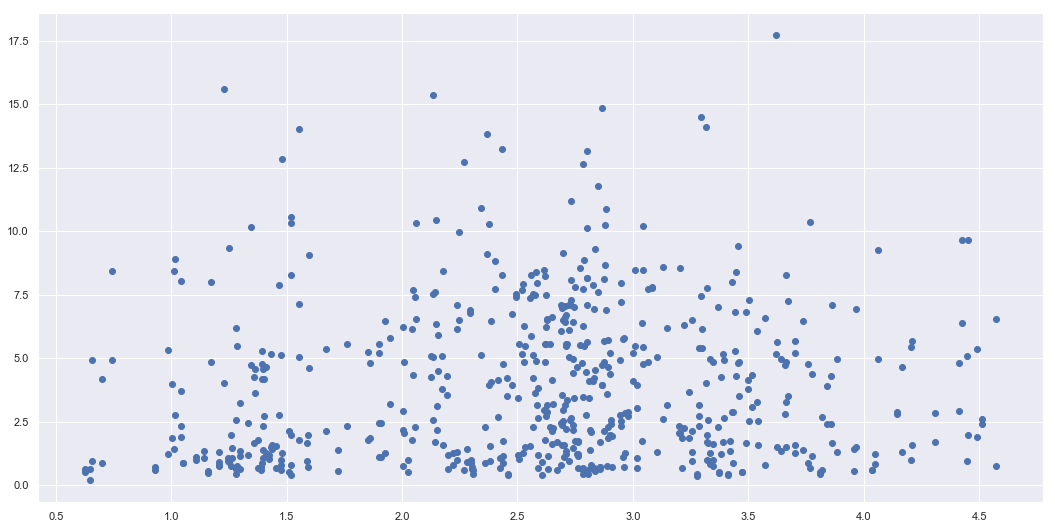

In [16]:
x_without_self = [ls[0] for ls in combd_data_without_self]
y_without_self = [ls[1] for ls in combd_data_without_self]
yhat_without_self = scipy.signal.savgol_filter(y, 501, 2) # window size 51, polynomial order 3

plt.scatter(x_without_self,y_without_self)
plt.plot(x_without_self,yhat_without_self, color='red')
plt.title('Protien similarity vs docking performance')
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()
print("Correlation: ", scipy.stats.pearsonr(x, y))

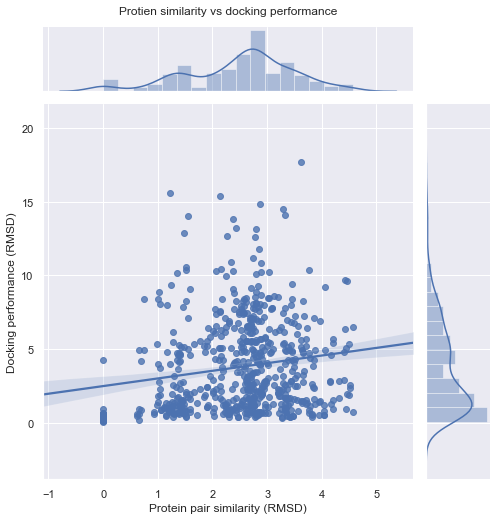

In [17]:
import seaborn as sns

sns.set(style="darkgrid")
g = sns.jointplot(x, y, kind="reg", height=7)
plt.title('Protien similarity vs docking performance', pad=90)
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()


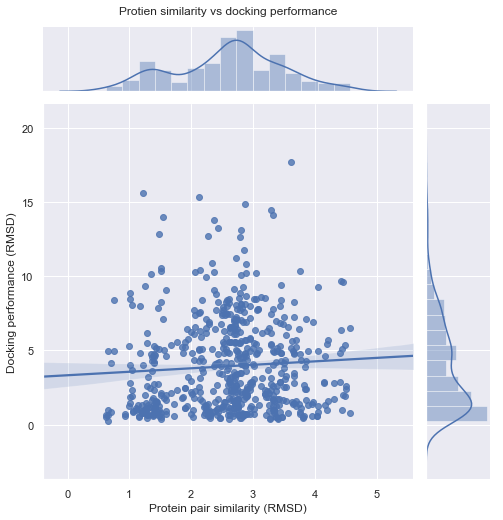

In [18]:
sns.set(style="darkgrid")
g = sns.jointplot(x_without_self, y_without_self, kind="reg", height=7)
plt.title('Protien similarity vs docking performance', pad=90)
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()

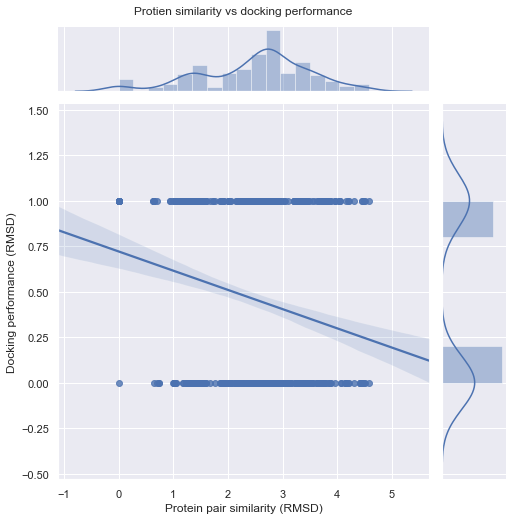

In [19]:
CUTOFF = 2.5
bin_data = []
for data in combd_data:
    if data[1] < CUTOFF:
        bin_data.append([data[0], 1])
    else:
        bin_data.append([data[0], 0])
        
x_bin = [ls[0] for ls in bin_data]
y_bin = [ls[1] for ls in bin_data]
sns.set(style="darkgrid")
g = sns.jointplot(x_bin, y_bin, kind="reg", height=7)
plt.title('Protien similarity vs docking performance', pad=90)
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()

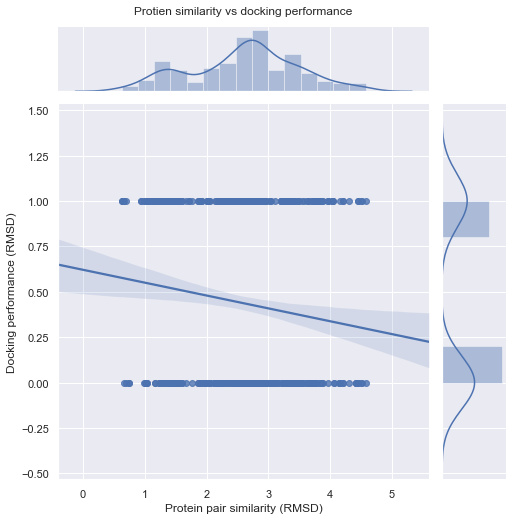

In [20]:
CUTOFF = 2.5
bin_data_without_self = []
for data in combd_data_without_self:
    if data[1] < CUTOFF:
        bin_data_without_self.append([data[0], 1])
    else:
        bin_data_without_self.append([data[0], 0])
        
x_bin_without_self = [ls[0] for ls in bin_data_without_self]
y_bin_without_self = [ls[1] for ls in bin_data_without_self]

sns.set(style="darkgrid")
g = sns.jointplot(x_bin_without_self, y_bin_without_self, kind="reg", height=7)
plt.title('Protien similarity vs docking performance', pad=90)
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()

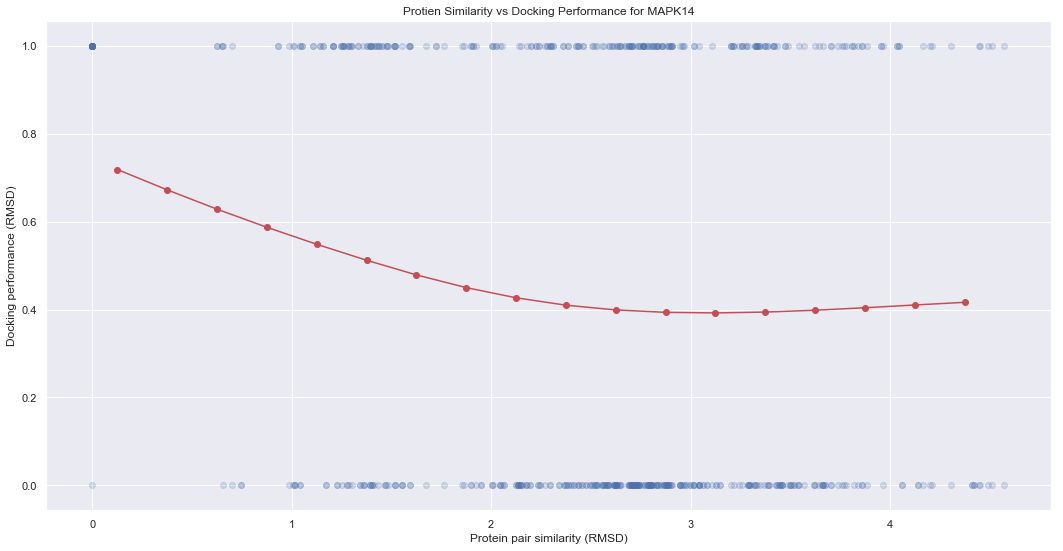

In [21]:
def weighted_moving_average(x,y,step_size=0.05,width=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    #We're going to weight with a Gaussian function
    def gaussian(x,amp=1,mean=0,sigma=1):
        return amp*np.exp(-(x-mean)**2/(2*sigma**2))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        weights = gaussian(x,mean=bin_center,sigma=width)
        bin_avg[index] = np.average(y,weights=weights)

    return (bin_centers,bin_avg)

plt.scatter(x_bin, y_bin, alpha=0.2)
x_avg, y_avg = weighted_moving_average(x_bin, y_bin, step_size=0.25, width=0.8)
plt.plot(x_avg, y_avg, 'o-', color='r')    
plt.title('Protien Similarity vs Docking Performance for MAPK14')
plt.xlabel('Protein pair similarity (RMSD)')
plt.ylabel('Docking performance (RMSD)')
plt.show()

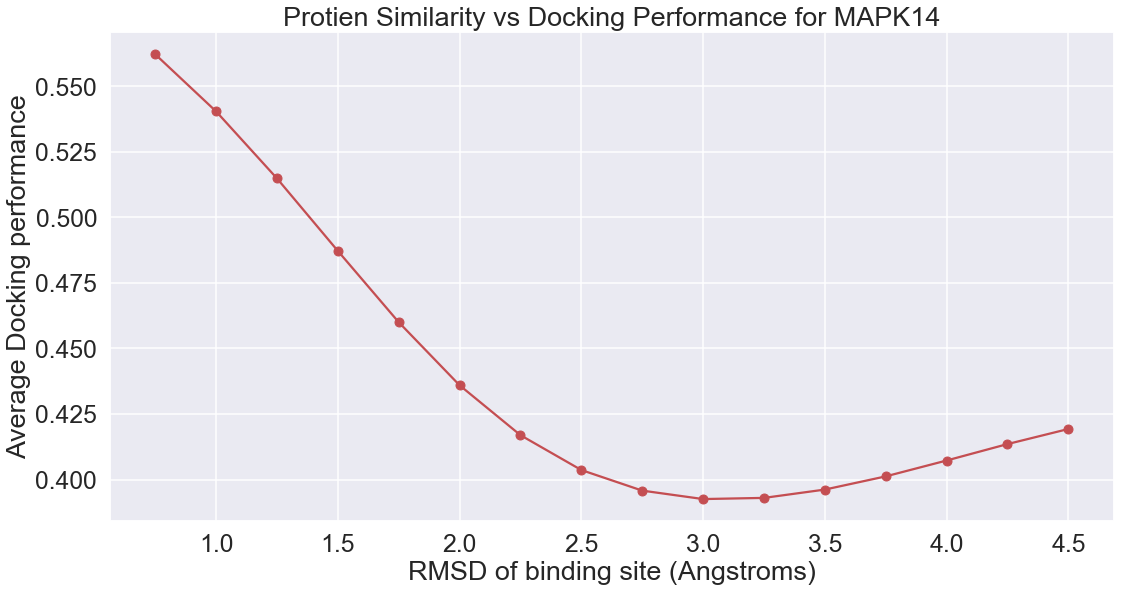

In [23]:
sns.set_context("talk", font_scale=1.5)
#plt.scatter(x_bin_without_self, y_bin_without_self, alpha=0.2)
x_avg_without_self, y_avg_without_self = weighted_moving_average(x_bin_without_self, y_bin_without_self, step_size=0.25, width=0.8)
plt.plot(x_avg_without_self, y_avg_without_self, 'o-', color='r')    
plt.title('Protien Similarity vs Docking Performance for MAPK14')
plt.xlabel('RMSD of binding site (Angstroms)')
plt.ylabel('Average Docking performance')
plt.show()